<a href="https://colab.research.google.com/github/ridhofp3/21_2241720142_Mobile/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

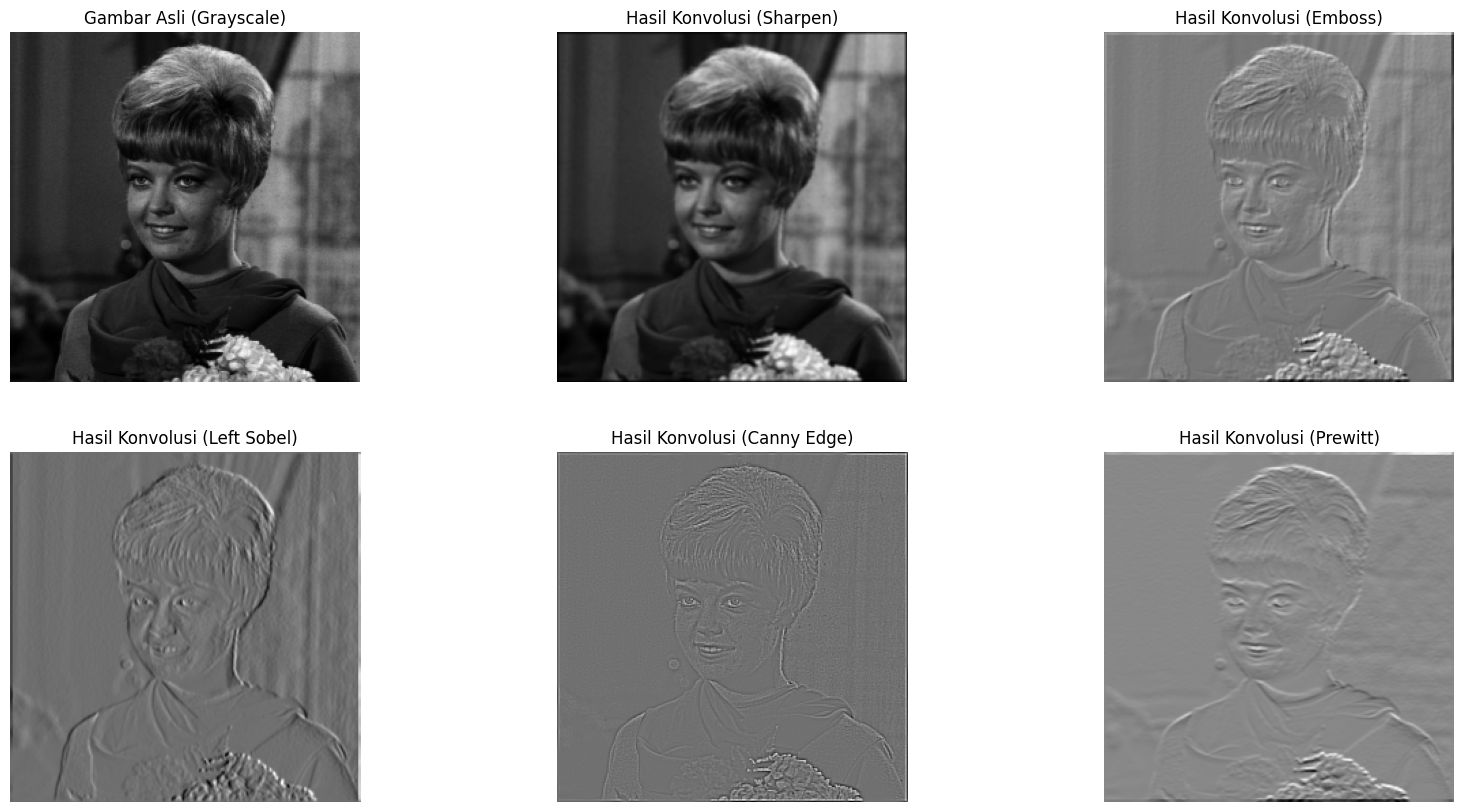

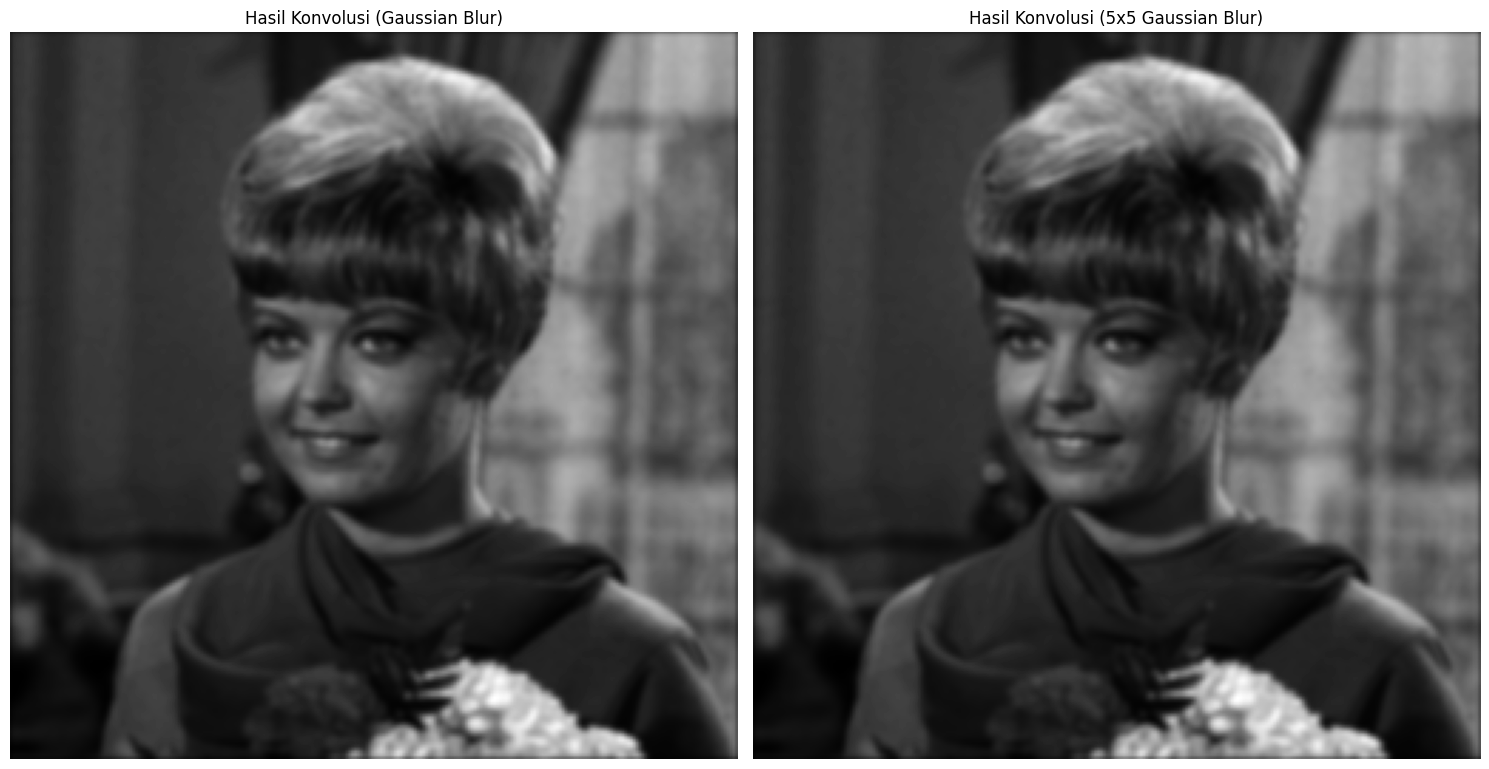

In [50]:
# Fungsi konvolusi
def convolution2D(image, kernel, stride, padding):
    # Ukuran gambar dan kernel
    img_h, img_w = image.shape
    kernel_h, kernel_w = kernel.shape

    # Tentukan padding (jika ada)
    if padding > 0:
        image_padded = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')
    else:
        image_padded = image

    # Ukuran gambar setelah padding
    padded_h, padded_w = image_padded.shape

    # Hitung ukuran hasil output setelah konvolusi dengan stride
    result_h = (padded_h - kernel_h) // stride + 1
    result_w = (padded_w - kernel_w) // stride + 1
    result = np.zeros((result_h, result_w))

    # Operasi konvolusi
    for i in range(result_h):
        for j in range(result_w):
            # Ambil area gambar yang sesuai dengan ukuran kernel, dengan stride
            region = image_padded[i*stride:i*stride+kernel_h, j*stride:j*stride+kernel_w]
            # Kalikan elemen-elemen dan jumlahkan hasilnya
            result[i, j] = np.sum(region * kernel)

    return result

# Load citra dan ubah menjadi grayscale
image_path = '/content/drive/MyDrive/Images/female.tiff'  # Path ke gambar
img = cv.imread(image_path)
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Kernel untuk sharpen
kernel_sharpen = np.array([[1, 2,  1],
                           [2, 4, 2],
                           [1, 2,  1]])

# Kernel untuk emboss
kernel_emboss = np.array([[-2, -1, 0],
                          [-1,  1, 1],
                          [0,   1, 2]])

# Kernel untuk Left Sobel Edge Detection
kernel_lsed = np.array([[ 1,  0, -1],
                        [ 2,  0, -2],
                        [ 1,  0, -1]])

# Kernel untuk Canny Edge Detection
kernel_ced = np.array([[-1, -1, -1],
                       [-1,  8, -1],
                       [-1, -1, -1]])

# Kernel untuk Prewitt Edge Detection
kernel_ped = np.array([[-1, -1, -1],
                       [0,  0, 0],
                       [1,  1, 1]])

# Kernel untuk 5x5 Gaussian Blur
kernel_gaussian_blur = (1/256) * np.array([[1,  4,  6,  4,  1],
                                            [4, 16, 24, 16,  4],
                                            [6, 24, 36, 24,  6],
                                            [4, 16, 24, 16,  4],
                                            [1,  4,  6,  4,  1]])

# Membuat kernel untuk 21x21 Gaussian Blur
kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.T

# Panggil fungsi konvolusi dengan kernel sharpen
output_sharpen = convolution2D(img_gray, kernel_sharpen, 1, 2)

# Panggil fungsi konvolusi dengan kernel emboss
output_emboss = convolution2D(img_gray, kernel_emboss, 1, 2)

# Panggil fungsi konvolusi dengan kernel Left Sobel Edge Detection
output_lsed = convolution2D(img_gray, kernel_lsed, 1, 2)

# Panggil fungsi konvolusi dengan kernel Canny Edge Detection
output_ced = convolution2D(img_gray, kernel_ced, 1, 2)

# Panggil fungsi konvolusi dengan kernel Prewitt Edge Detection
output_ped = convolution2D(img_gray, kernel_ped, 1, 2)

# Panggil fungsi konvolusi dengan kernel Gaussian Blur
output_gaussian_blur = convolution2D(img_gray, kernel_gaussian_blur, 1, 2)

# Tampilkan gambar hasil konvolusi dengan enam kernel dalam 2 baris
plt.figure(figsize=(20, 10))

# Gambar asli
plt.subplot(2, 3, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Gambar Asli (Grayscale)')
plt.axis('off')

# Hasil konvolusi dengan kernel sharpening
plt.subplot(2, 3, 2)
plt.imshow(output_sharpen, cmap='gray')
plt.title('Hasil Konvolusi (Sharpen)')
plt.axis('off')

# Hasil konvolusi dengan kernel emboss
plt.subplot(2, 3, 3)
plt.imshow(output_emboss, cmap='gray')
plt.title('Hasil Konvolusi (Emboss)')
plt.axis('off')

# Hasil konvolusi dengan kernel Left Sobel Edge Detection
plt.subplot(2, 3, 4)
plt.imshow(output_lsed, cmap='gray')
plt.title('Hasil Konvolusi (Left Sobel)')
plt.axis('off')

# Hasil konvolusi dengan kernel Canny Edge Detection
plt.subplot(2, 3, 5)
plt.imshow(output_ced, cmap='gray')
plt.title('Hasil Konvolusi (Canny Edge)')
plt.axis('off')

# Hasil konvolusi dengan kernel Prewitt Edge Detection
plt.subplot(2, 3, 6)
plt.imshow(output_ped, cmap='gray')
plt.title('Hasil Konvolusi (Prewitt)')
plt.axis('off')

plt.figure(figsize=(15, 10))

# Tambahkan subplot untuk hasil Gaussian Blur di bawah
plt.subplot(1, 2, 1)
plt.imshow(output_gaussian_blur, cmap='gray')
plt.title('Hasil Konvolusi (Gaussian Blur)')
plt.axis('off')

# Tambahkan subplot untuk hasil Gaussian Blur 21 X 21 di bawah
plt.subplot(1, 2, 2)
plt.imshow(output_gaussian_blur, cmap='gray')
plt.title('Hasil Konvolusi (5x5 Gaussian Blur)')
plt.axis('off')

plt.tight_layout()  # Atur tata letak agar tidak tumpang tindih
plt.show()
